# Exploratory Data Analysis and Visualization

## Objective

The objective in this notebook is as follows: 
1. Load the notebook from the web
2. Clean and wrangle the data into a tidy format
3. Propose a visualization that is relevant to addressing the question and to explore the data.
    * propose a high quality plot or set of plots of the same kind
    * explain why it is relevant in addressing the question or exploring the data

In this notebook, we will briefly review characteristics of the data and visualize aspects of the data to further understand and identify any underlying patterns.

In [1]:
library(tidyverse)
library(arsenal)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'arsenal'


The following object is masked from 'package:lubridate':

    is.Date




The data is loaded from the `fuminaba-project` branch of the github repository [fuminaba/STAT-301](https://github.com/fuminaba/STAT-301/tree/fuminaba-project). The feature names are assigned to their respective columns.

In [2]:
# >>> Define paths to repository and data folder <<< #
repo_path  <- "https://raw.githubusercontent.com/fuminaba/STAT-301"
data_parent_path <- "/fuminaba-project/Data"

# >>> Load Training and Testing Data <<< #
data.train <- paste0(repo_path, data_parent_path, "/adult.data")  %>% 
    read_csv(col_names = F)
data.test  <- paste0(repo_path, data_parent_path, '/adult.test') %>% 
    read_csv(col_names = F, skip = 1)

# >>> Define feature names and rename columns <<< #
feature_names <- c('age', 'workclass', 'fnlwgt', 'education',
                   'education_num', 'marital_status', 'occupation',
                   'relationship', 'race', 'sex', 'capital_gain', 
                   'capital_loss', 'hours_per_week', 'native_country',
                   'income')

names(data.train) <- feature_names
names(data.test) <- feature_names

# >>> For EDA, we will combine train and test data <<< #
data.all <- rbind(data.train, data.test)

Rows: 32561 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X2, X4, X6, X7, X8, X9, X10, X14, X15
dbl (6): X1, X3, X5, X11, X12, X13

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 16281 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X2, X4, X6, X7, X8, X9, X10, X14, X15
dbl (6): X1, X3, X5, X11, X12, X13

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
invisible(capture.output(DataExplorer::create_report(data = data.all)))



processing file: report.rmd

output file: G:/BCCRC-IO/iostudies/Courses/STAT-301/STAT-301/2-EDA-and-Visualization/report.knit.md



Output created: G:/BCCRC-IO/iostudies/Courses/STAT-301/STAT-301/2-EDA-and-Visualization/report.html



## Exploratory Data Analysis

The data of interest is the [`adult`](https://archive.ics.uci.edu/dataset/2/adult) dataset, a census dataset of 14 explanatory variables and one predicted variable of `income`, a binary variable which describes if a person makes less than or equal to $50k, (`income` = 0) or more than $50k (`income` = 1). The objective of this dataset is to predict whether an individual in the United States makes more than $50k per year based on the explanatory features measured in the census described below. 

| Variable Name | Description | Type of Variable | 
| --- | --- | --- | 
| `age` | Age of individual | Feature, Integer | 
| `workclass` | Categorical variable describing individuals' working class | Feature, Categorical | 
| `fnlwgt` | Unknown | Feature, Integer | 
| `education` | Describes the education level of an individual | Feature, Categorical | 
| `education-num` | Numerical description of education level | Feature, Integer | 
| `marital-status` | Married, not-married etc. of the individual | Feature, Categorical | 
| `occupation` | General description of individuals' job | Feature, Categorical | 
| `relationship` | Relationship status of individual | Feature, Categorical | 
| `race` | Race of individual | Feature, Categorical | 
| `sex` | Sex of individual | Feature, Categorical | 
| `capital-gain` | Capital gain of individual | Feature, Integer | 
| `capital-loss` | Capital loss of an individual | Feature, Integer | 
| `hours-per-week` | Hours worked per week | Feature, Integer | 
| `native-country` | Native country of individual | Feature, Categorical | 
| `income` | Binary >50K or <=50K income | Target, Categorical | 

For a prediction problem such as this one, plotting variable distributions stratified by their outcome class often provides insight into which variables are discriminatory of the target class. This dataset contains redundancies where some variables have both a numeric and categorical representation. (Such as `education` and `education-num`.) Thus when plotting distributions stratified by target class, we can plot the numeric representation. 

First, we will observe the factor levels in the target variable.

In [4]:
data.all$income %>% as_factor() %>% levels(.)

[1] "<=50K"  ">50K"   "<=50K." ">50K."

We see that there are four levels when we only expect two. The difference is that there is a '.' at the end of `<=50K` and `>50K`. However, in reality this does not make a difference in the predicted classes, thus we need to process this feature to remove the '.'. 

In [5]:
data.all$income <- data.all$income %>% str_remove('[*.]')
data.all <- data.all %>% 
    mutate_if(is.character, as_factor) 

data.all$income %>% as_factor() %>% levels(.)

[1] "<=50K" ">50K"

In [6]:
data.all %>% 
    select_if(is.factor) %>% 
    sapply(levels)

$workclass
[1] "State-gov"        "Self-emp-not-inc" "Private"          "Federal-gov"     
[5] "Local-gov"        "?"                "Self-emp-inc"     "Without-pay"     
[9] "Never-worked"    

$education
 [1] "Bachelors"    "HS-grad"      "11th"         "Masters"      "9th"         
 [6] "Some-college" "Assoc-acdm"   "Assoc-voc"    "7th-8th"      "Doctorate"   
[11] "Prof-school"  "5th-6th"      "10th"         "1st-4th"      "Preschool"   
[16] "12th"        

$marital_status
[1] "Never-married"         "Married-civ-spouse"    "Divorced"             
[4] "Married-spouse-absent" "Separated"             "Married-AF-spouse"    
[7] "Widowed"              

$occupation
 [1] "Adm-clerical"      "Exec-managerial"   "Handlers-cleaners"
 [4] "Prof-specialty"    "Other-service"     "Sales"            
 [7] "Craft-repair"      "Transport-moving"  "Farming-fishing"  
[10] "Machine-op-inspct" "Tech-support"      "?"                
[13] "Protective-serv"   "Armed-Forces"      "Priv-house-serv"  

$relationship
[1] "Not-in-family"  "Husband"        "Wife"           "Own-child"     
[5] "Unmarried"      "Other-relative"

$race
[1] "White"              "Black"              "Asian-Pac-Islander"
[4] "Amer-Indian-Eskimo" "Other"             

$sex
[1] "Male"   "Female"

$native_country
 [1] "United-States"              "Cuba"                      
 [3] "Jamaica"                    "India"                     
 [5] "?"                          "Mexico"                    
 [7] "South"                      "Puerto-Rico"               
 [9] "Honduras"                   "England"                   
[11] "Canada"                     "Germany"                   
[13] "Iran"                       "Philippines"               
[15] "Italy"                      "Poland"                    
[17] "Columbia"                   "Cambodia"                  
[19] "Thailand"                   "Ecuador"                   
[21] "Laos"                       "Taiwan"                    
[23] "Haiti"                      "Portugal"                  
[25] "Dominican-Republic"         "El-Salvador"               
[27] "France"                     "Guatemala"                 
[29] "China"                      "Japan"                     
[31] "Yugoslavia"                 "Peru"                      
[33] "Outlying-US(Guam-USVI-etc)" "Scotland"                  
[35] "Trinadad&Tobago"            "Greece"                    
[37] "Nicaragua"                  "Vietnam"                   
[39] "Hong"                       "Ireland"                   
[41] "Hungary"                    "Holand-Netherlands"        

$income
[1] "<=50K" ">50K"

We have now verified that the duplication of levels in `income` has been solved, and there are no duplicate leves in the other categorical features.  
As we are interested in predicting the `income` of individuals, we may want to see which features are most likely relevant in the prediction. 

In [7]:
tableby(income~., data = data.all, total = TRUE) %>% 
    summary(text = TRUE)



|                              |     <=50K (N=37155)     |     >50K (N=11687)      |     Total (N=48842)     | p value|
|:-----------------------------|:-----------------------:|:-----------------------:|:-----------------------:|-------:|
|age                           |                         |                         |                         | < 0.001|
|-  Mean (SD)                  |     36.872 (14.104)     |     44.275 (10.559)     |     38.644 (13.711)     |        |
|-  Range                      |     17.000 - 90.000     |     19.000 - 90.000     |     17.000 - 90.000     |        |
|workclass                     |                         |                         |                         | < 0.001|
|-  State-gov                  |       1451 (3.9%)       |       530 (4.5%)        |       1981 (4.1%)       |        |
|-  Self-emp-not-inc           |       2785 (7.5%)       |       1077 (9.2%)       |       3862 (7.9%)       |        |
|-  Private                    |      

We see that many of the categorical variables have a statistically significant difference between the different `income` classes. We can generate plots for each feature stratified by the `income` variable. Another characteristic of the data, is that there are many categorical variables (8 explanatory categorical variables and 6 numerical explanatory variables). We can visualize different categorical variables by the `income` using the interactions (`income:categorical`) 

In [8]:
colnames(data.all)

[1] "age"            "workclass"      "fnlwgt"         "education"     
 [5] "education_num"  "marital_status" "occupation"     "relationship"  
 [9] "race"           "sex"            "capital_gain"   "capital_loss"  
[13] "hours_per_week" "native_country" "income"

The question being answered in this dataset is:  
> What features in the census data from 1994 are most important in predicting whether an individual in the United States makes >$50,000 or <= $50,000 per year? 

We know that the amount that an individual earns in a year is dependent on many factors, such as job experience, occupation, qualifications etc. 
We can visualize the distribution of numerical variables stratified by categorical variables such as `income` and `occupation`. For instance, we can visualize the `education_num` of an individual by their `income` and `occupation`.

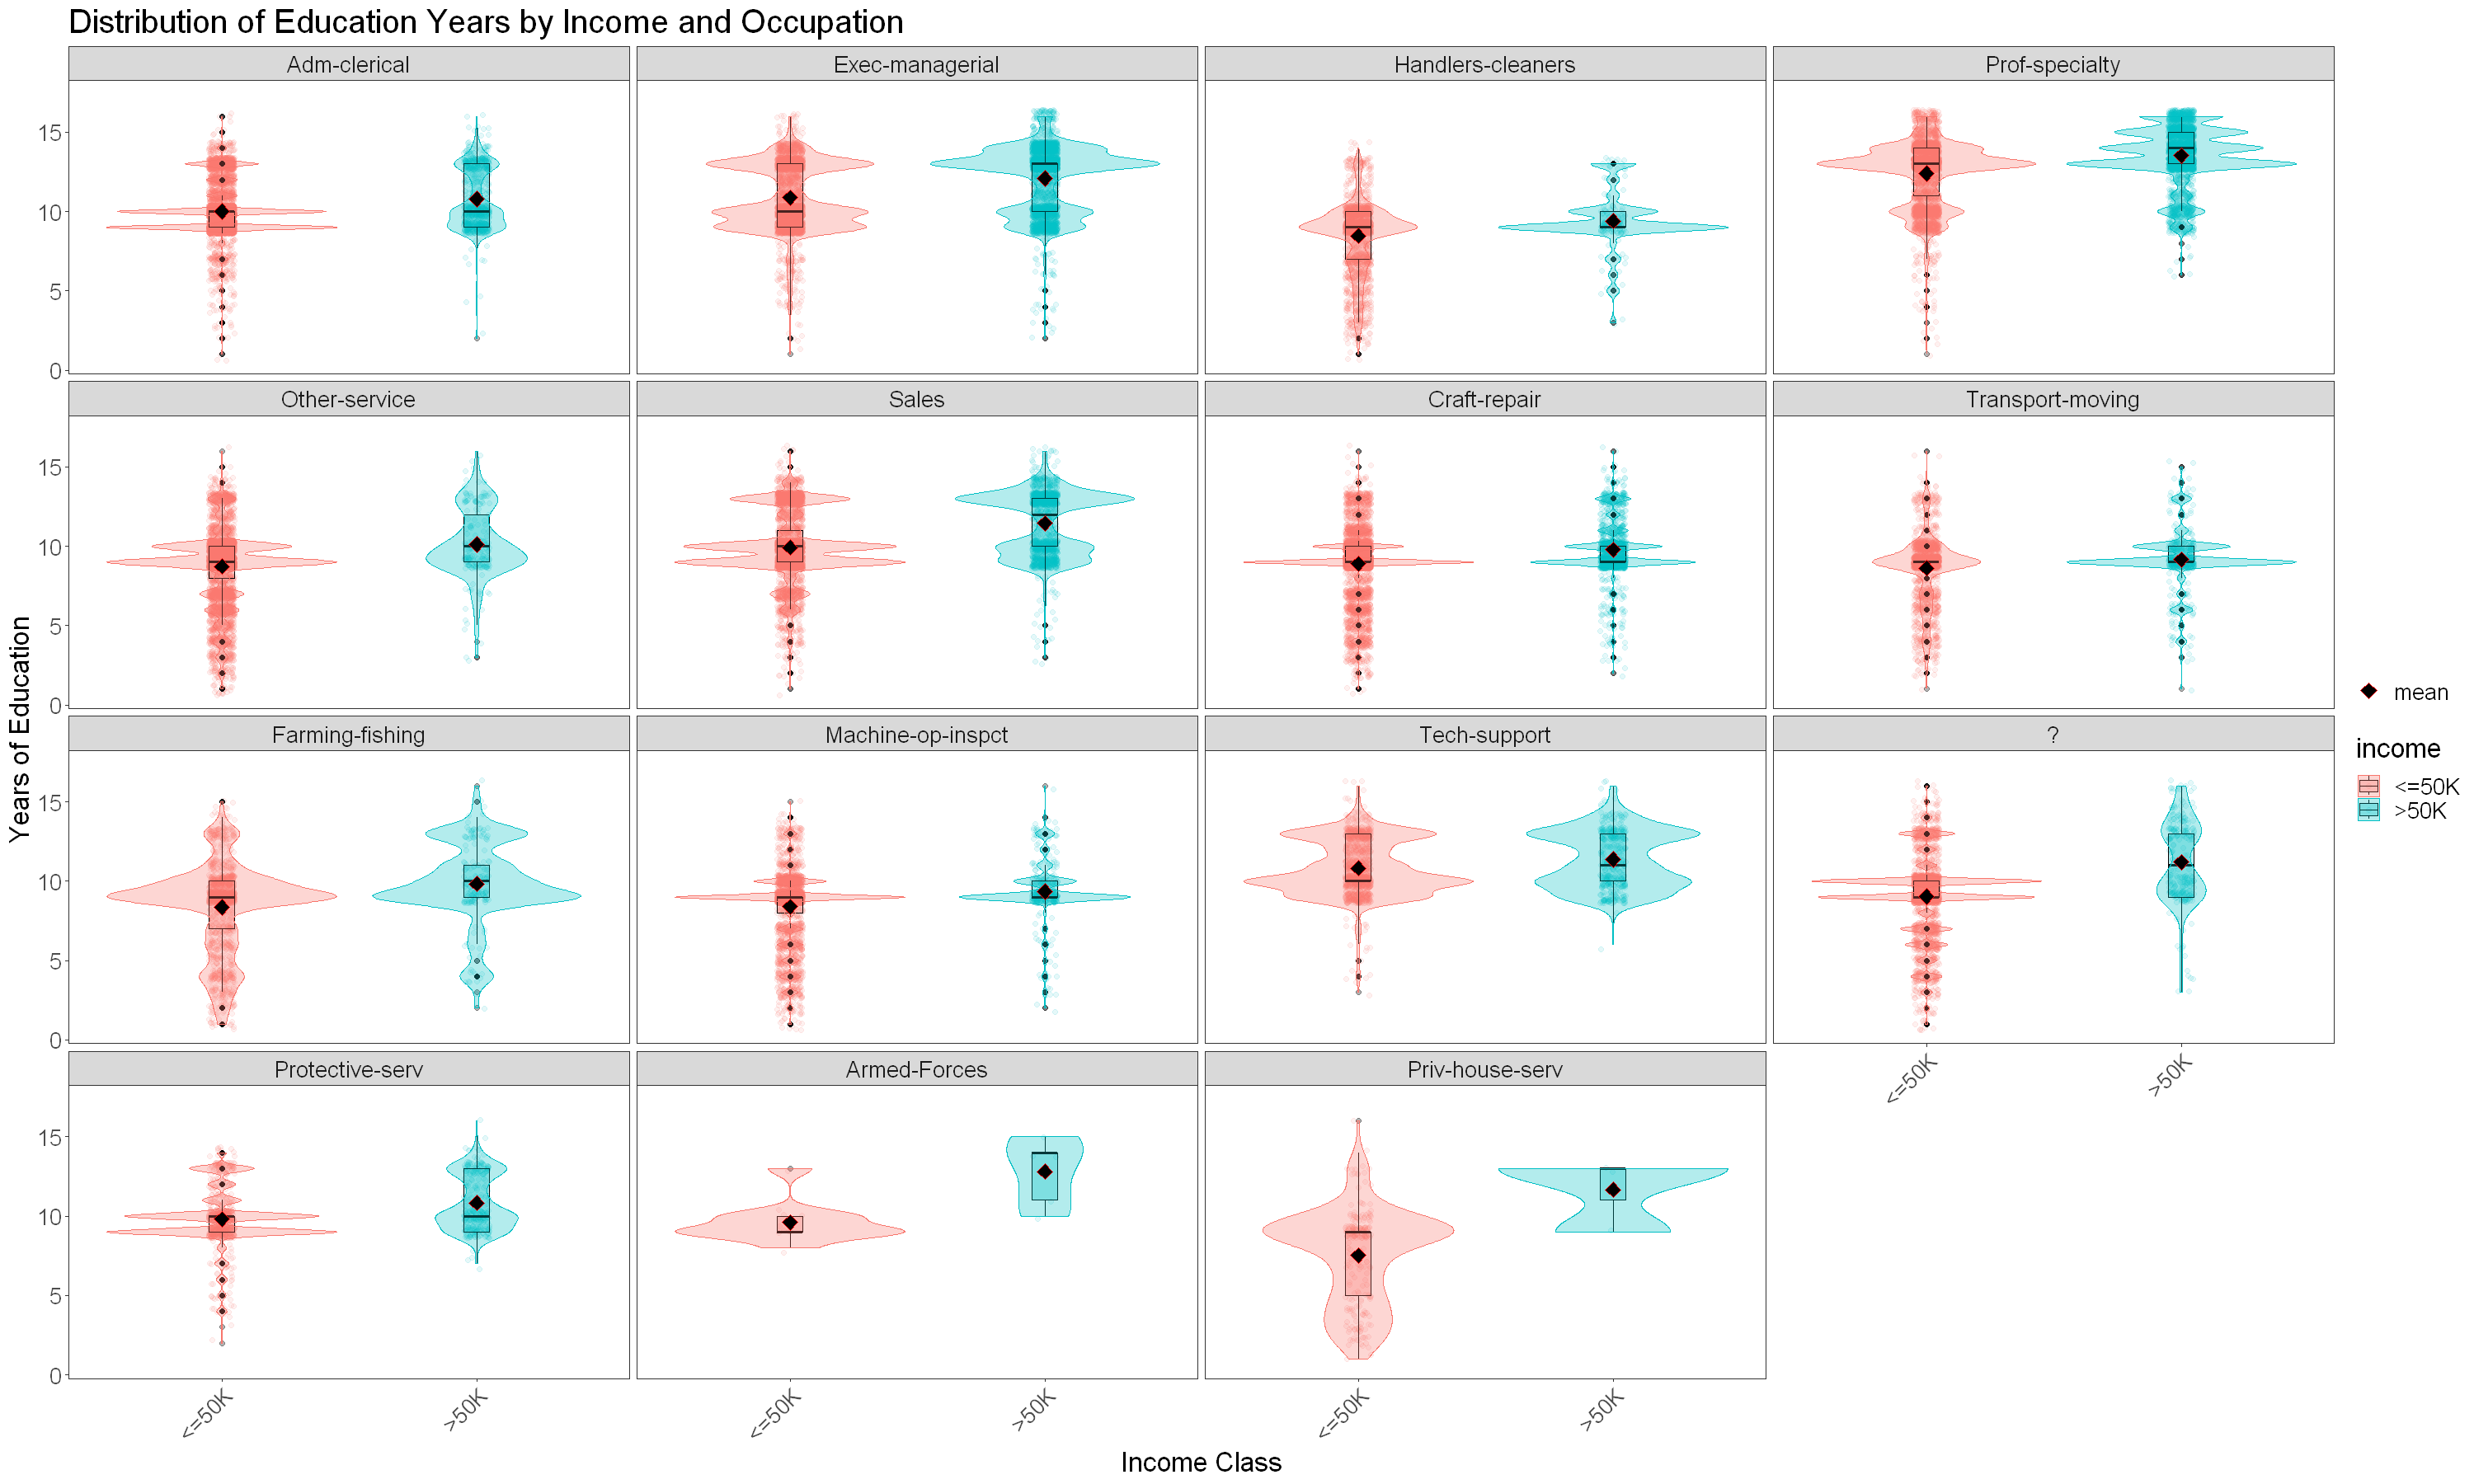

In [101]:
options(repr.plot.width = 25, repr.plot.height = 15)
plot.occupation_vs_numerical <- data.all %>% 
    ggplot(aes(x = income, y = education_num, 
               fill = income, color = income)) + 
        geom_jitter(position = position_jitter(0.05), 
                    alpha = 0.1) + 
        geom_boxplot(alpha = 0.3, color = 'black', width = 0.1, 
                     position = position_dodge(0.9)) + 
        geom_violin(alpha = 0.3, position = position_dodge(0.9)) +
        stat_summary(mapping = aes(shape = 'mean'), 
                     color = 'red', fill = 'black',
                     size = 4, fun.data = 'mean_cl_normal', 
                     geom = 'point') +
        scale_shape_manual("", values = c("mean" = 23)) + 
        facet_wrap(~occupation) +
        theme_bw() +
        theme(panel.grid.major = element_blank(),
              panel.grid.minor = element_blank(),
              axis.text.x = element_text(angle = 45, hjust = 1),
              text = element_text(size = 20)) + 
        labs(
            title = "Distribution of Education Years by Income and Occupation",
            x = "Income Class", 
            y = "Years of Education")
             
plot.occupation_vs_numerical

Interestingly from the plot, the number of years in education can be quite similar between individuals that make >$50k vs <=$50k, for some jobs like tech-support, or sales. Hoever, for individuals in occupations such as Armed-forces or Priv-house-serv show a large difference in the number of years in education between individuals making >$50k vs <=$50k. 

We can also generate a similar plot using `age`. Unfortunately there is no feature describing the number of years of experience in each job, but we can approximate this using `age` assuming individuals have not changed careers multiple times in their lifetime.

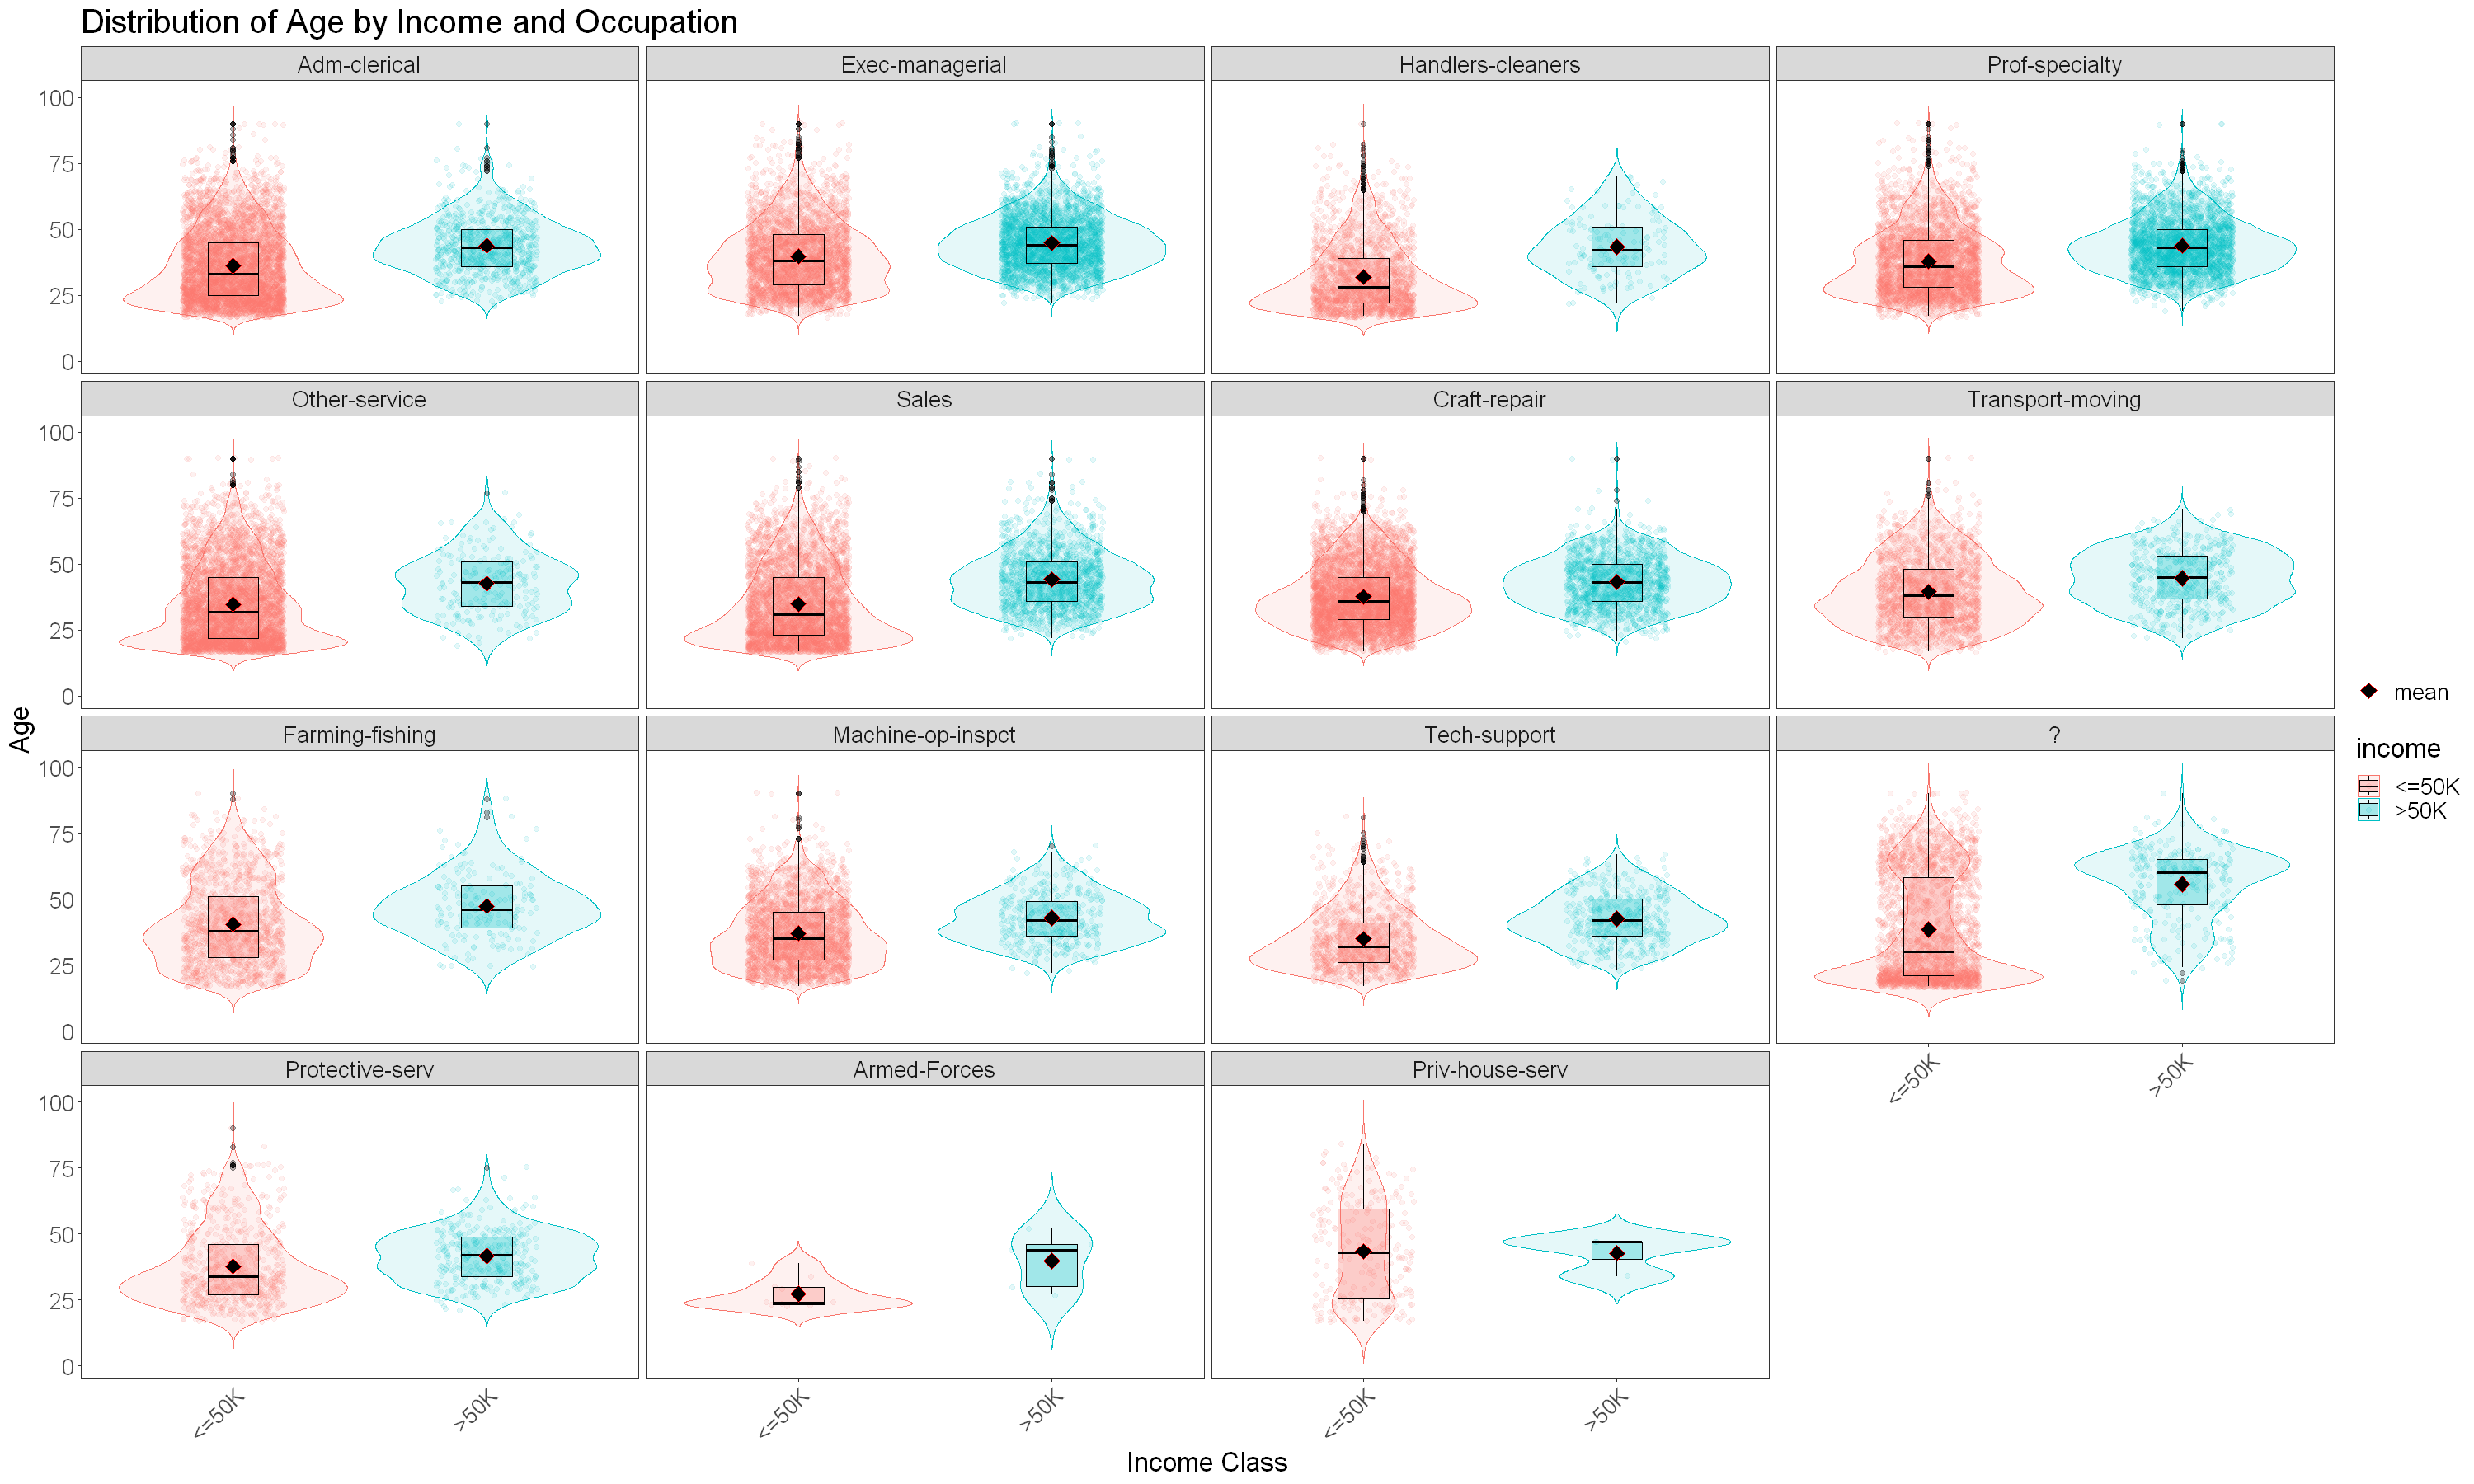

In [90]:
options(repr.plot.width = 25, repr.plot.height = 15)
plot.occupation_vs_numerical <- data.all %>% 
    ggplot(aes(x = income, y = age, 
               fill = income, 
               color = income)) + 
        geom_jitter(position = position_jitter(0.2), 
                    alpha = 0.1) + 
        geom_violin(position = position_dodge(0.9), 
                    alpha = 0.1, trim = F) + 
        geom_boxplot(alpha = 0.3, color = 'black', width = 0.1, 
                     position = position_dodge(0.9)) + 
        stat_summary(mapping = aes(shape = 'mean'), 
                     color = 'red', fill = 'black',
                     size = 4, fun.data = 'mean_cl_normal', 
                     geom = 'point') +
        scale_shape_manual("", values = c("mean" = 23)) + 
        facet_wrap(~occupation) +
        theme_bw() +
        theme(panel.grid.major = element_blank(),
              panel.grid.minor = element_blank(),
              axis.text.x = element_text(angle = 45, hjust = 1),
              text = element_text(size = 20)) + 
        labs(
            title = "Distribution of Age by Income and Occupation",
            x = "Income Class", 
            y = "Age")
             
plot.occupation_vs_numerical

From the above plot alone, we learn that the distribution of `age` within the two income classes are different - there is a weak association of `age` and higher income. 

Lastly, we can visualize the distribution for `hours_per_week` worked for each occupation to see if an individual's income for a given occupation correlates with the number of hours worked. 

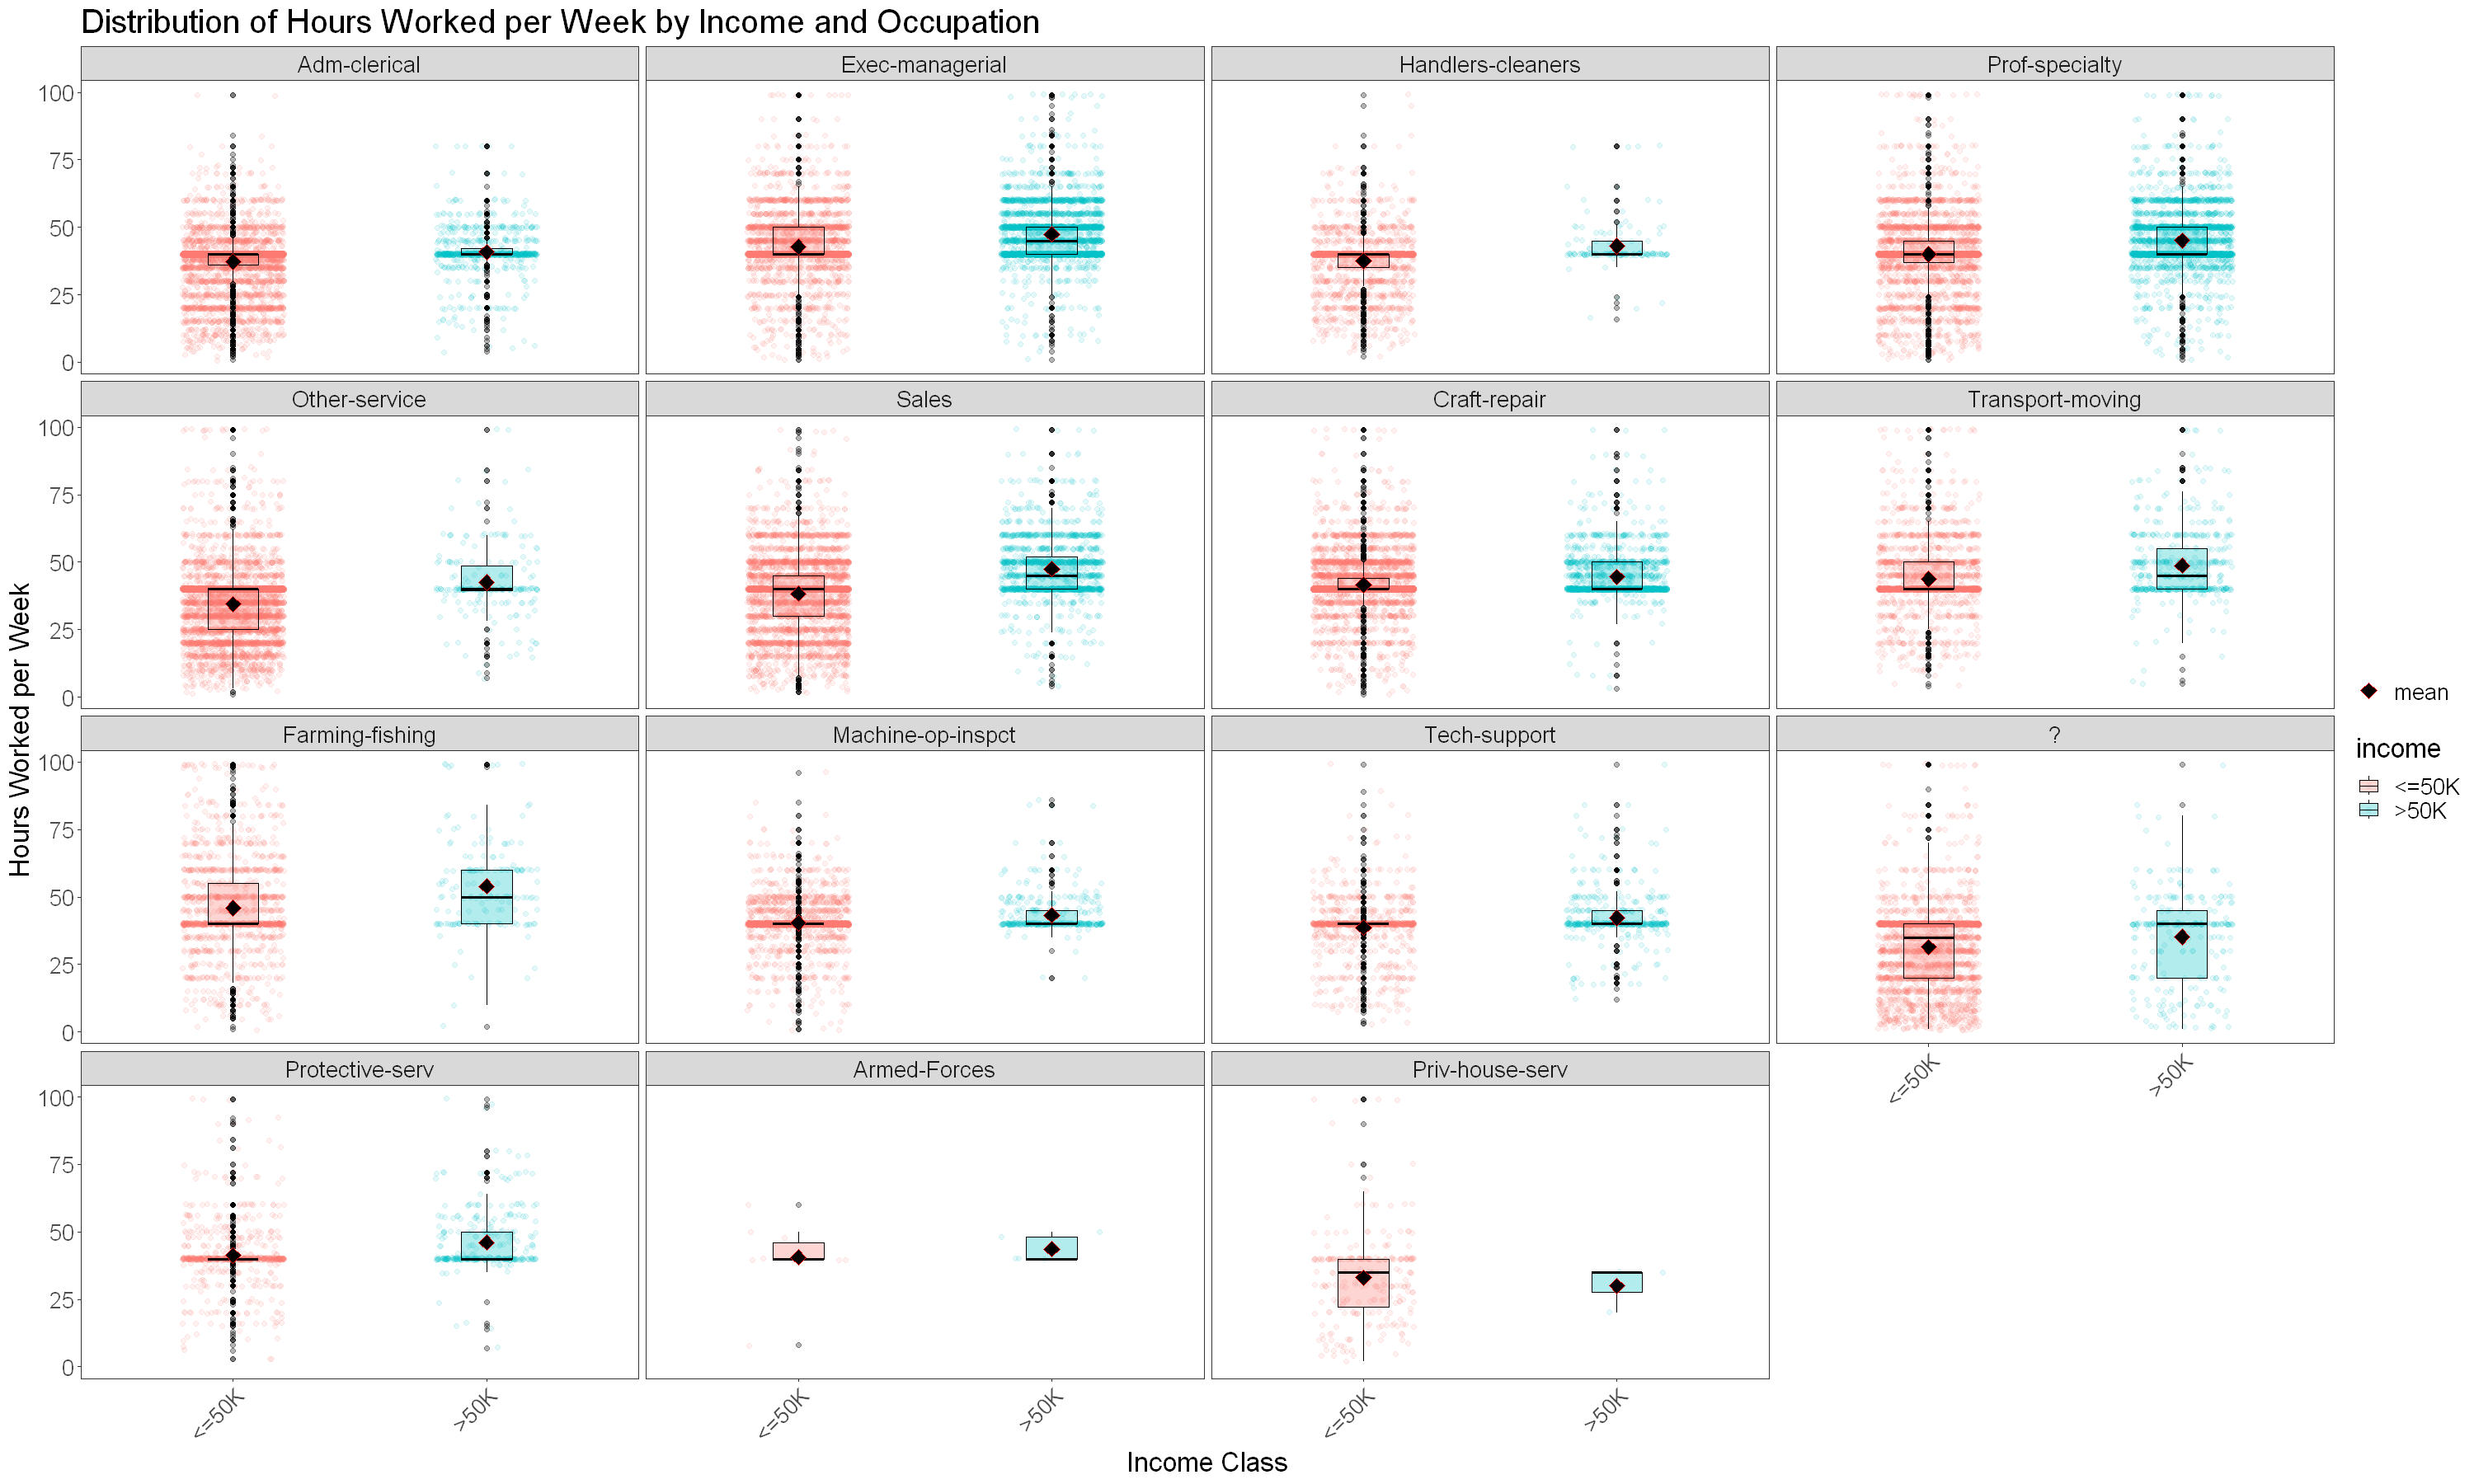

In [92]:
options(repr.plot.width = 25, repr.plot.height = 15)
plot.occupation_vs_numerical <- data.all %>% 
    ggplot(aes(x = income, y = hours_per_week, 
               fill = income, 
               color = income)) + 
        geom_jitter(position = position_jitter(0.2), 
                    alpha = 0.1) + 
        geom_boxplot(alpha = 0.3, color = 'black', width = 0.1, 
                     position = position_dodge(0.9)) + 
        stat_summary(mapping = aes(shape = 'mean'), 
                     color = 'red', fill = 'black',
                     size = 4, fun.data = 'mean_cl_normal', 
                     geom = 'point') +
        scale_shape_manual("", values = c("mean" = 23)) + 
        facet_wrap(~occupation) +
        theme_bw() +
        theme(panel.grid.major = element_blank(),
              panel.grid.minor = element_blank(),
              axis.text.x = element_text(angle = 45, hjust = 1),
              text = element_text(size = 20)) + 
        labs(
            title = "Distribution of Hours Worked per Week by Income and Occupation",
            x = "Income Class", 
            y = "Hours Worked per Week")
             
plot.occupation_vs_numerical

From this plot we learn that for majority of the occupations, the hours worked per week does not have a significant association between individuals making >$50k and <=$50k. Thus we can infer that the individuals making >$50k are paid higher due to the nature of their work, or have additional sources of income. 